##### ! 상대적으로 비지도학습보다는 지도학습이 실제로 더 많이 사용된다고 한다.

##### 심층적인 내용은 생략하고, 간단하게 의미만 설명할 예정

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("image save:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 군집 분석(Cluster Analysis)

비지도학습에서 데이터의 유사성을 확인하기 위해 사용되는 분석 방법

군집 내 유사성, 군집 간 상이을 확인하는 분석방법

#### Mean Shift(평균 이동)

데이터 분포의 Peak(데이터가 가장 밀집된 곳)을 이동하며 분포의 중심을 찾는 알고리즘

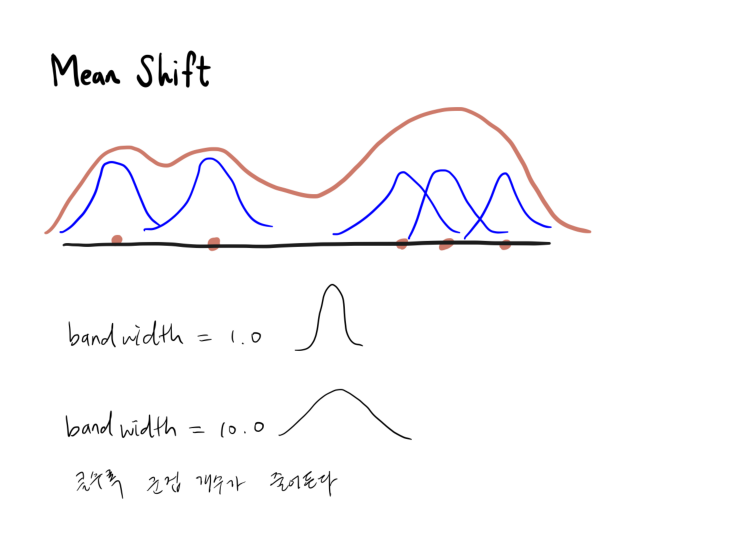

In [3]:
filename = "mean shift.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)

* 데이터의 분포를 이동하여 군집의 중심을 탐색
* 데이터 밀도가 가장 높은 곳으로 중심을 지속적으로 이동
* 군집의 중심점은 data points가 모여있는 곳이라는 가정
  * 확률 밀도 함수(Probability Density Function)
  * KDE(Kernel Density Estimation)
* Hyperparameter
  * bandwidth(폭)
  * bandwidth가 클수록 군집의 개수가 줄어든다.
  * estimate_bandwidth를 사용해 권장되는 폭을 알 수 있다.

#### DBSCAN(Density-Based Spatial Clustering of Applications with Noise, 밀도 기반 클러스터링)

점들이 밀집된 곳을 하나의 군집으로 보고, 밀도가 높은 곳의 데이터끼리 군집으로 묶어나가는 알고리즘

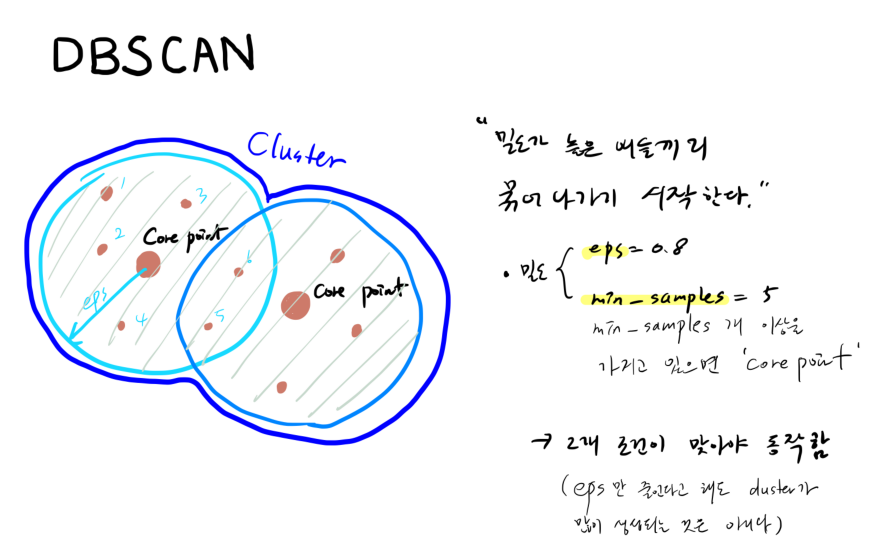

In [4]:
filename = "dbscan.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)

* 밀도(Density) 기반 군집
  * 기하학적으로 복잡한 데이터에도 효과적으로 군집 가능
  * 핵심 포인트(Core Point)들을 서로 연결하면서 군집화
* Hyperparameter
  * epsilon(esp, 입실론 주변 영역)
    * 개별 data points를 중심으로 ‘입실론 반경’을 가지는 주변 영역
    * ‘Core Point’ 기준
  * min point(min_samples, 최소 데이터 개수)
    * 개별 data points의 ‘입실론 주변 영역’에 포함되는 다른 data points의 개수
    * 조건 만족 시 ‘Core Point’로 지정

#### GMM(Gaussian Mixture Model, 가우시안 혼합 모델)

Gaussian 분포가 여러개 혼합된 Clustering 알고리즘

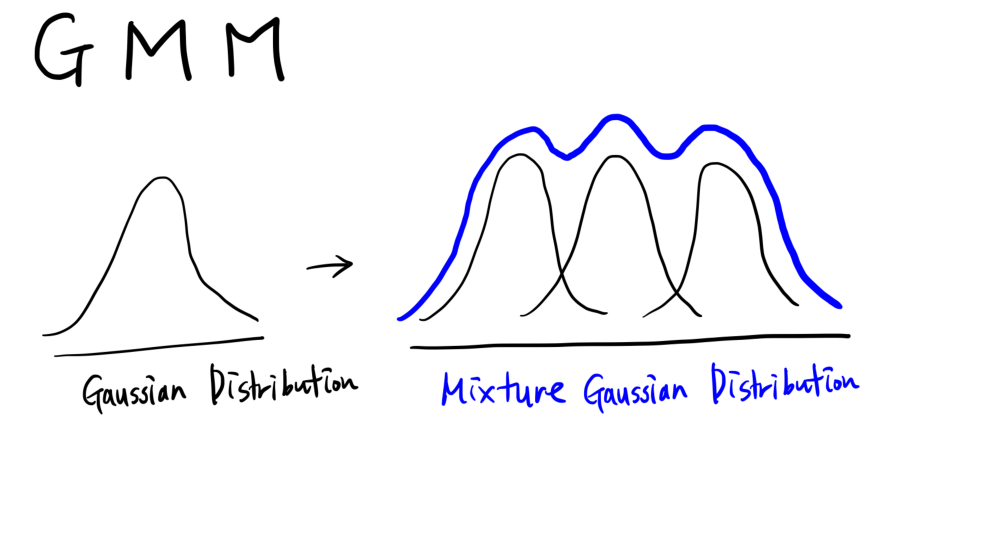

In [5]:
filename = "gmm.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)

* 데이터가 여러 개의 가우시안 분포(Gaussian Distribution)를 가진 데이터들의 집합이라고 가정
* 개별 정규분포의 모수(평균, 분산) 추정
* 각 data points가 어떤 정규분포에 해당하는지 확률 추정
* EM(Expectation and Maximization)

## K-평균 군집(K-means Clustering)

데이터 간 포함관계를 확인하기 위해 입력된 데이터를 K개의 군집(Cluster)으로 묶는 분석 방법

* 비지도학습의 일종
* 동일한 군집에 속하는 데이터는 유사성이 높고, 군집 간에는 유사성이 낮음
* 데이터간 유사성(Similarity)을 계산하여 유사성이 높은 개체의 군집을 생성
* 유사한 값을 갖는 특징을 적은 개수의 동질적 그룹으로 단순화
* 거리 계산을 위해 정량화할 수 있는 데이터가 필요함(명목형 X)

#### 동작 방식
* 최초 K개의 의사 중심점(Pseudo Center) 지정
* 군집 내의 데이터들 간의 거리를 최소화
* 군집 간의 거리를 최대화
* 분류된 데이터들의 평균점을 구하고 이동하는 과정을 반복
* 데이터는 오직 1개의 군집에만 포함됨

#### K
몇 개의 군집으로 분류할 것인가?

* 비즈니스 의사결정에 도움이 되는 수를 권장
* 군집의 개수를 늘릴수록 군집 내 유사성은 증가, 군집 간 차이점은 감소함
  * 군집이 너무 많으면, 군집 간 거리가 가까워져 군집 간 차이점이 없어지게 된다.
* Scree Plot(스크리 도표) 활용

## 주성분 분석(Principal Component Analysis, PCA)

Data points를 가장 잘 구별해주는 주성분(배후의 변수)을 찾는 기법
각 항목을 가장 잘 구별해주는 변수를 찾는 일

* 차원 축소 기법
  * 주성분(적은수의 변수)으로 전체 데이터 세트 표현 가능
  * 데이터 세트에서 의미 있는 선(축)을 찾는 과정
* 주성분
  * Data points가 가장 넓게 분포(분산이 큰)하는 차원
  * 가장 많은 정보를 포함한 차원을 따라 데이터가 넓게 분포함
* 각 차원이 직교인 경우 PCA가 유용함
* 비지도 학습의 일종

##### 고차원 공간의 데이터를 저차원 공간으로 변환(2차원 -> 선형)

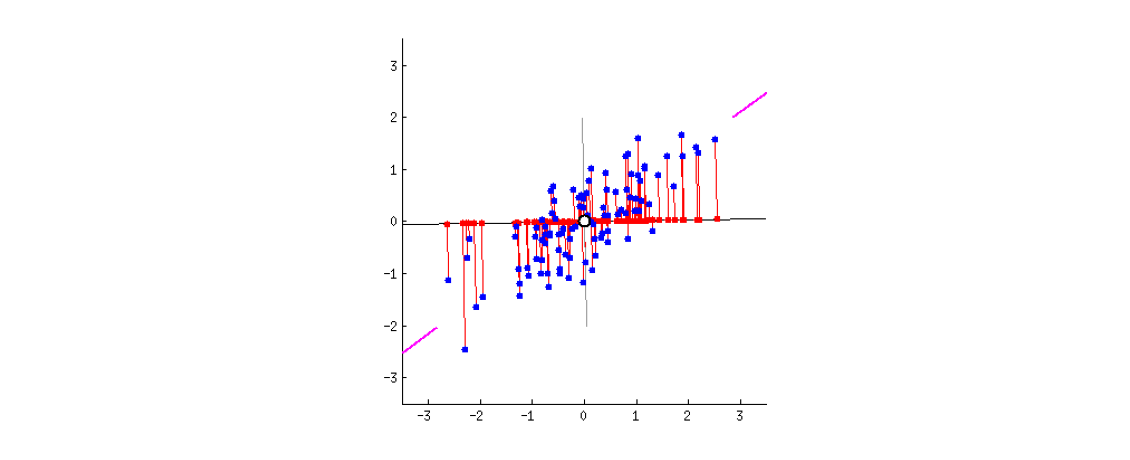

In [7]:
filename = "pca.gif"
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)  # 움짤인데 안 움직임

## 실루엣 분석(Silhouette Analysis)

군집 분석의 성능 평가를 위한 도구

* 군집 분석은 군집 내 데이터들의 거리는 가까울 수록, 군집 간 거리는 멀 수록 좋다고 할 수 있다.
* shilhouette_score는 0과 1사이의 값을 가지고, 1에 가까울수록 좋다. 

In [ ]:
filename = "silhouette analysis.png"
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
show_img = mpimg.imread(os.path.join(images_path, filename))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(show_img)  # 움짤인데 안 움직임